In [43]:
import pandas as pd
df = pd.read_csv('assignment_df.csv')
df.head()


,Unnamed: 0,Language,Position_16,Position_31,Position_41,Position_42,Position_45,Position_46,Position_68,Position_72,...,Position_1971,Position_1981,Position_1984,Position_1989,Position_1991,Position_1992,Position_1993,Position_1994,Position_1995,Position_1998
0,102,FRENCH,1,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,1,0
1,106,ITALIAN,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,108,JUDEO_ESPAGNOL,1,1,0,0,1,0,1,1,...,1,0,0,1,1,1,1,0,1,1
3,110,LATIN,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,125,PORTUGUESE,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0


In [44]:
from scipy.spatial.distance import pdist, squareform

# Drop the Unnamed 0 and Language columns for distance calculation
data = df.drop(columns=['Unnamed: 0', 'Language'])

# Calculate Euclidean distance matrix
euclidean_dist_matrix = squareform(pdist(data, metric='euclidean'))

# Calculate Dollo distance matrix
dollo_dist_matrix = squareform(pdist(data, metric='dice'))

# Convert distance matrices to DataFrames for better readability
euclidean_df = pd.DataFrame(euclidean_dist_matrix, index=df['Language'], columns=df['Language'])
dollo_df = pd.DataFrame(dollo_dist_matrix, index=df['Language'], columns=df['Language'])

euclidean_df, dollo_df

(Language           FRENCH    ITALIAN  JUDEO_ESPAGNOL      LATIN  PORTUGUESE  \
 Language                                                                      
 FRENCH           0.000000  12.449900       14.933185  13.892444   12.922848   
 ITALIAN         12.449900   0.000000       13.190906  12.727922   12.884099   
 JUDEO_ESPAGNOL  14.933185  13.190906        0.000000  15.099669   14.491377   
 LATIN           13.892444  12.727922       15.099669   0.000000   14.352700   
 PORTUGUESE      12.922848  12.884099       14.491377  14.352700    0.000000   
 SPANISH         13.490738  11.532563       10.630146  14.035669   13.152946   
 
 Language          SPANISH  
 Language                   
 FRENCH          13.490738  
 ITALIAN         11.532563  
 JUDEO_ESPAGNOL  10.630146  
 LATIN           14.035669  
 PORTUGUESE      13.152946  
 SPANISH          0.000000  ,
 Language          FRENCH   ITALIAN  JUDEO_ESPAGNOL     LATIN  PORTUGUESE  \
 Language                                       

<ipython-input-45-e5497d941277>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  euclidean_linkage = linkage(euclidean_dist_matrix, method='average')
<ipython-input-45-e5497d941277>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dollo_linkage = linkage(dollo_dist_matrix, method='average')


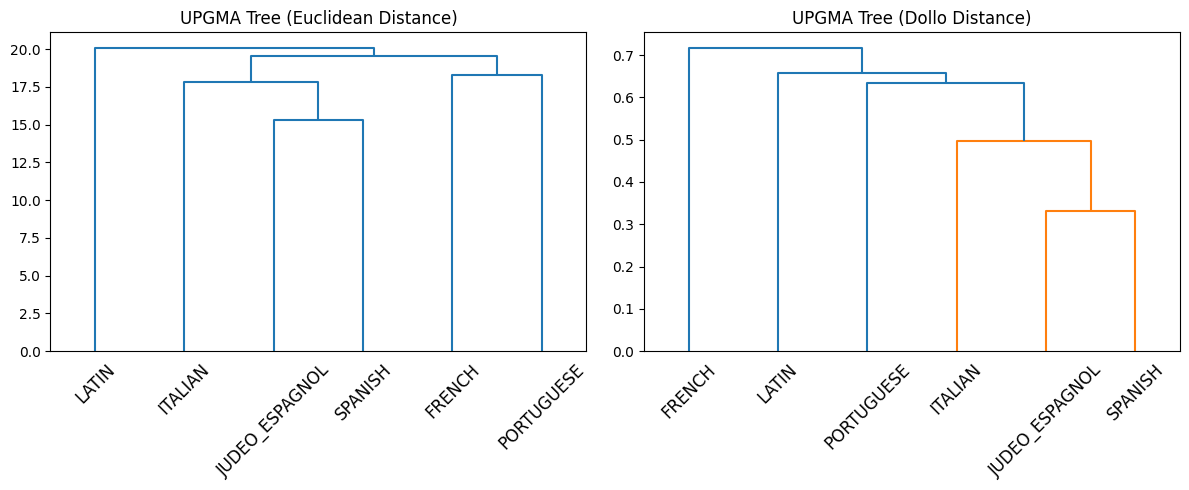

In [45]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Apply UPGMA algorithm to Euclidean distance matrix
euclidean_linkage = linkage(euclidean_dist_matrix, method='average')

# Apply UPGMA algorithm to Dollo (dice) distance matrix
dollo_linkage = linkage(dollo_dist_matrix, method='average')

# Plot dendrograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
dendrogram(euclidean_linkage, labels=df['Language'].tolist(), leaf_rotation=45)
plt.title('UPGMA Tree (Euclidean Distance)')

plt.subplot(1, 2, 2)
dendrogram(dollo_linkage, labels=df['Language'].tolist(), leaf_rotation=45)
plt.title('UPGMA Tree (Dollo Distance)')
plt.tight_layout()
plt.show()



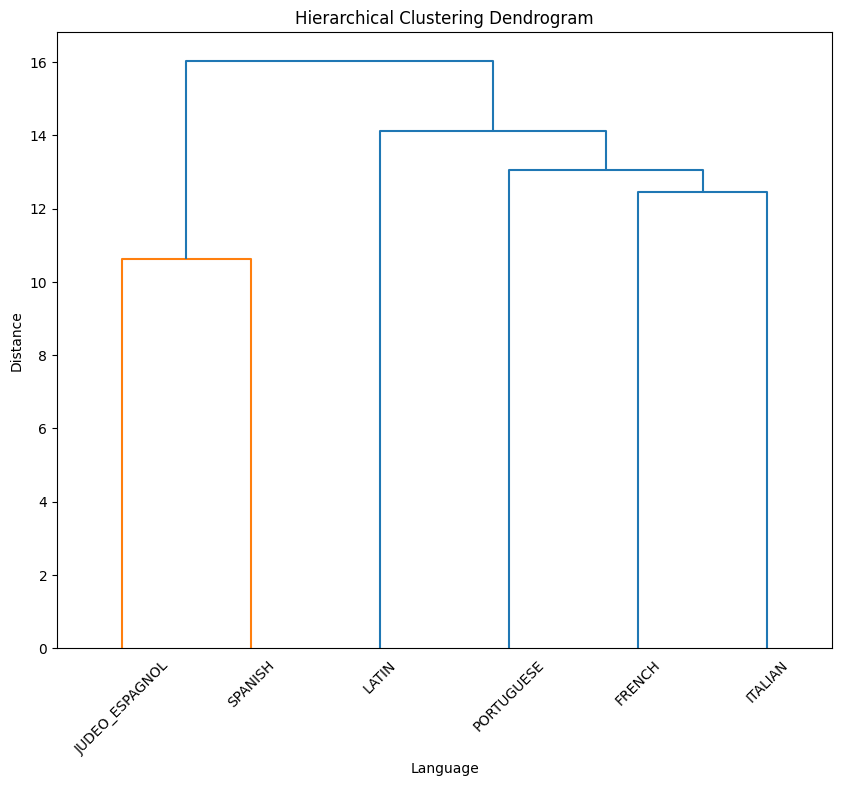

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

languages = df.iloc[:, 1].values
features = df.iloc[:, 2:].values

# Perform hierarchical clustering
Z = linkage(features, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=languages, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Language')
plt.ylabel('Distance')
plt.show()


In [47]:
from scipy.spatial.distance import pdist, squareform
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from Bio import Phylo
import pandas as pd

# Drop the 'Language' column for distance calculation
data = df.drop(columns=['Language'])

# Calculate Dice distance matrix (Dollo model)
dice_distances = pdist(data, metric='dice')
dice_distance_matrix = squareform(dice_distances)

# Convert the full Dice distance matrix to a lower triangular format
dice_distance_matrix_lower = []
for i in range(len(dice_distance_matrix)):
    row = dice_distance_matrix[i][:i+1].tolist()
    dice_distance_matrix_lower.append(row)

# Convert the Dice distance matrix to a format compatible with BioPython
languages = df['Language'].tolist()
dice_distance_matrix_biopython = DistanceMatrix(names=languages, matrix=dice_distance_matrix_lower)

# Construct the NeighborJoining tree
constructor = DistanceTreeConstructor()
neighbor_joining_tree = constructor.nj(dice_distance_matrix_biopython)

# Export the NeighborJoining tree to a Newick file
with open("neighbor_joining_tree.nwk", "w") as output_file:
    Phylo.write(neighbor_joining_tree, output_file, "newick")